In [161]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [162]:
data = pd.read_csv(r'C:\Users\kapilesh\Desktop\TABLE_III._Deaths_in_122_U.S._cities.csv')

In [163]:
data.head()

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), All Ages**, flag","All causes, by age (years), >=65","All causes, by age (years), >=65, flag","All causes, by age (years), 45-64","All causes, by age (years), 45-64, flag","All causes, by age (years), 25-44","All causes, by age (years), 25-44, flag","All causes, by age (years), 1-24","All causes, by age (years), 1-24, flag","All causes, by age (years), LT 1","All causes, by age (years), LT 1, flag",P&I Total,"P&I Total, flag",Location 1
0,New England,2016,1,600,NaN,426.0,NaN,125.0,NaN,28.0,NaN,12.0,NaN,9.0,NaN,47.0,NaN,NaN
1,Mid. Atlantic,2016,1,807,NaN,563.0,NaN,181.0,NaN,32.0,NaN,13.0,NaN,18.0,NaN,32.0,NaN,NaN
2,E.N. Central,2016,1,2468,NaN,1611.0,NaN,594.0,NaN,167.0,NaN,62.0,NaN,34.0,NaN,159.0,NaN,NaN
3,W.N. Central,2016,1,634,NaN,432.0,NaN,150.0,NaN,31.0,NaN,9.0,NaN,11.0,NaN,37.0,NaN,NaN
4,S. Atlantic,2016,1,1402,NaN,893.0,NaN,343.0,NaN,92.0,NaN,32.0,NaN,41.0,NaN,88.0,NaN,NaN


In [164]:
data = data.drop(['All causes, by age (years), All Ages**, flag','All causes, by age (years), >=65, flag',
                  'All causes, by age (years), 45-64, flag', 'All causes, by age (years), 25-44, flag',
                  'All causes, by age (years), 1-24, flag', 'All causes, by age (years), LT 1, flag', 
                  'P&I Total, flag'],axis =1)

In [165]:
#Dropping the columns that don't have any data

In [166]:
data.head()

,Reporting Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), >=65","All causes, by age (years), 45-64","All causes, by age (years), 25-44","All causes, by age (years), 1-24","All causes, by age (years), LT 1",P&I Total,Location 1
0,New England,2016,1,600,426.0,125.0,28.0,12.0,9.0,47.0,NaN
1,Mid. Atlantic,2016,1,807,563.0,181.0,32.0,13.0,18.0,32.0,NaN
2,E.N. Central,2016,1,2468,1611.0,594.0,167.0,62.0,34.0,159.0,NaN
3,W.N. Central,2016,1,634,432.0,150.0,31.0,9.0,11.0,37.0,NaN
4,S. Atlantic,2016,1,1402,893.0,343.0,92.0,32.0,41.0,88.0,NaN


In [167]:
data = data.rename(columns = {'Location 1':'Locn', 'Reporting Area':'Area'})

In [168]:
data.head()

,Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), >=65","All causes, by age (years), 45-64","All causes, by age (years), 25-44","All causes, by age (years), 1-24","All causes, by age (years), LT 1",P&I Total,Locn
0,New England,2016,1,600,426.0,125.0,28.0,12.0,9.0,47.0,NaN
1,Mid. Atlantic,2016,1,807,563.0,181.0,32.0,13.0,18.0,32.0,NaN
2,E.N. Central,2016,1,2468,1611.0,594.0,167.0,62.0,34.0,159.0,NaN
3,W.N. Central,2016,1,634,432.0,150.0,31.0,9.0,11.0,37.0,NaN
4,S. Atlantic,2016,1,1402,893.0,343.0,92.0,32.0,41.0,88.0,NaN


In [169]:
#data['Location'] = data.Area.str.extract('([A-Za-z]+)\, ')
data['Location'] = data.Area.str.extract('([A-Za-z. ]+)')
data['State'] = data.Area.str.extract(', ([A-Za-z]+)')

C:\Users\kapilesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
C:\Users\kapilesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


In [170]:
data.tail()

,Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), >=65","All causes, by age (years), 45-64","All causes, by age (years), 25-44","All causes, by age (years), 1-24","All causes, by age (years), LT 1",P&I Total,Locn,Location,State
4825,"Las Vegas, NV",2016,39,291,197.0,62.0,28.0,3.0,1.0,20.0,"Las Vegas, NV (36.169202, -115.140597)",Las Vegas,NV
4826,"Reading, PA",2016,39,15,12.0,1.0,1.0,1.0,NaN,1.0,"Reading, PA (40.336919, -75.921965)",Reading,PA
4827,"Camden, NJ",2016,39,17,12.0,5.0,NaN,NaN,NaN,1.0,"Camden, NJ (39.945208, -75.118833)",Camden,NJ
4828,"Dallas, TX",2016,39,218,127.0,62.0,18.0,4.0,7.0,14.0,"Dallas, TX (37.691113, -122.472221)",Dallas,TX
4829,"Cambridge, MA",2016,39,13,8.0,2.0,3.0,NaN,NaN,1.0,"Cambridge, MA (42.365248, -71.105015)",Cambridge,MA


In [171]:
data.head()

,Area,MMWR YEAR,MMWR WEEK,"All causes, by age (years), All Ages**","All causes, by age (years), >=65","All causes, by age (years), 45-64","All causes, by age (years), 25-44","All causes, by age (years), 1-24","All causes, by age (years), LT 1",P&I Total,Locn,Location,State
0,New England,2016,1,600,426.0,125.0,28.0,12.0,9.0,47.0,NaN,New England,NaN
1,Mid. Atlantic,2016,1,807,563.0,181.0,32.0,13.0,18.0,32.0,NaN,Mid. Atlantic,NaN
2,E.N. Central,2016,1,2468,1611.0,594.0,167.0,62.0,34.0,159.0,NaN,E.N. Central,NaN
3,W.N. Central,2016,1,634,432.0,150.0,31.0,9.0,11.0,37.0,NaN,W.N. Central,NaN
4,S. Atlantic,2016,1,1402,893.0,343.0,92.0,32.0,41.0,88.0,NaN,S. Atlantic,NaN


In [172]:
data = data.drop(['Locn','Area'],axis =1)


In [173]:
data = data.rename(columns = {'All causes, by age (years), All Ages**':'Allages', 'All causes, by age (years), >=65':'Age>=65', 
                              'All causes, by age (years), 45-64':'Age45-64', 'All causes, by age (years), 25-44':'Age25-44', 
                              'All causes, by age (years), 1-24':'Age1-24', 'All causes, by age (years), LT 1':'Age<1'})

In [174]:
data.head()

,MMWR YEAR,MMWR WEEK,Allages,Age>=65,Age45-64,Age25-44,Age1-24,Age<1,P&I Total,Location,State
0,2016,1,600,426.0,125.0,28.0,12.0,9.0,47.0,New England,NaN
1,2016,1,807,563.0,181.0,32.0,13.0,18.0,32.0,Mid. Atlantic,NaN
2,2016,1,2468,1611.0,594.0,167.0,62.0,34.0,159.0,E.N. Central,NaN
3,2016,1,634,432.0,150.0,31.0,9.0,11.0,37.0,W.N. Central,NaN
4,2016,1,1402,893.0,343.0,92.0,32.0,41.0,88.0,S. Atlantic,NaN


In [175]:
data.isnull().sum()

MMWR YEAR       0
MMWR WEEK       0
Allages         0
Age>=65         6
Age45-64       52
Age25-44      472
Age1-24      1529
Age<1        1825
P&I Total     531
Location        0
State         390
dtype: int64

In [176]:
data.update(data[['Allages','Age>=65','Age45-64','Age25-44','Age1-24','Age<1']].fillna(0))

In [177]:
data.isnull().sum()

MMWR YEAR      0
MMWR WEEK      0
Allages        0
Age>=65        0
Age45-64       0
Age25-44       0
Age1-24        0
Age<1          0
P&I Total    531
Location       0
State        390
dtype: int64

In [179]:
data2 = data[(data.Location == 'Total') | (data.Location == 'Total_') | (data.Location == 'New England') | 
     (data.Location== 'Mid. Atlantic') | (data.Location== 'E.N. Central') | (data.Location== 'W.N. Central') |
     (data.Location== 'S. Atlantic') | (data.Location== 'E.S. Central') | (data.Location== 'W.S. Central') | 
     (data.Location== 'Mountain') | (data.Location== 'Pacific')]

In [180]:
data2.head()

,MMWR YEAR,MMWR WEEK,Allages,Age>=65,Age45-64,Age25-44,Age1-24,Age<1,P&I Total,Location,State
0,2016,1,600,426.0,125.0,28.0,12.0,9.0,47.0,New England,NaN
1,2016,1,807,563.0,181.0,32.0,13.0,18.0,32.0,Mid. Atlantic,NaN
2,2016,1,2468,1611.0,594.0,167.0,62.0,34.0,159.0,E.N. Central,NaN
3,2016,1,634,432.0,150.0,31.0,9.0,11.0,37.0,W.N. Central,NaN
4,2016,1,1402,893.0,343.0,92.0,32.0,41.0,88.0,S. Atlantic,NaN


In [181]:
data = data[(data.Location!= 'Total') & (data.Location!= 'Total_') & (data.Location!= 'New England') & 
     (data.Location!= 'Mid. Atlantic') & (data.Location!= 'E.N. Central') & (data.Location!= 'W.N. Central') &
     (data.Location!= 'S. Atlantic') & (data.Location!= 'E.S. Central') & (data.Location!= 'W.S. Central') & 
     (data.Location!= 'Mountain') & (data.Location!= 'Pacific')]

In [182]:
data=data.reset_index()

In [183]:
data.head()

,index,MMWR YEAR,MMWR WEEK,Allages,Age>=65,Age45-64,Age25-44,Age1-24,Age<1,P&I Total,Location,State
0,10,2016,1,86,62.0,15.0,4.0,3.0,2.0,5.0,St. Petersburg,FL
1,11,2016,1,227,143.0,57.0,21.0,5.0,1.0,7.0,Nashville,TN
2,12,2016,1,111,62.0,35.0,9.0,0.0,5.0,12.0,Washington,D
3,13,2016,1,59,31.0,17.0,7.0,2.0,1.0,3.0,Kansas City,MO
4,14,2016,1,300,203.0,64.0,25.0,5.0,3.0,21.0,Sacramento,CA


In [184]:
data[['MMWR WEEK', 'Allages']].groupby(['MMWR WEEK'], as_index=False).mean()

,MMWR WEEK,Allages
0,1,111.208696
1,2,103.610619
2,3,105.652174
3,4,108.155172
4,5,112.982456
5,6,112.276786
6,7,101.017241
7,8,109.721739
8,9,108.539130
9,10,112.026087


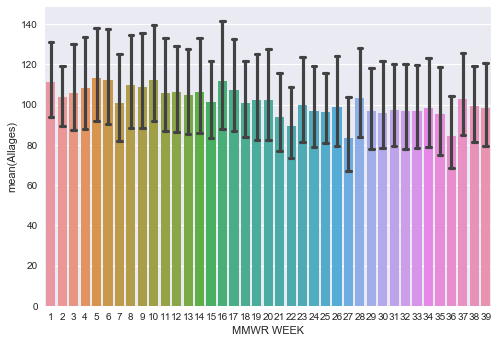

In [185]:
sns.set()
sns.barplot(x='MMWR WEEK', y='Allages', data=data, capsize = .4)
plt.show()

In [186]:
data[['State', 'Allages']].groupby(['State'], as_index=False).mean()

,State,Allages
0,AL,111.529915
1,AR,96.820513
2,AZ,191.527027
3,CA,122.320755
4,CO,28.600000
5,CT,37.333333
6,D,125.000000
7,DE,12.512821
8,FL,107.942308
9,GA,111.883117


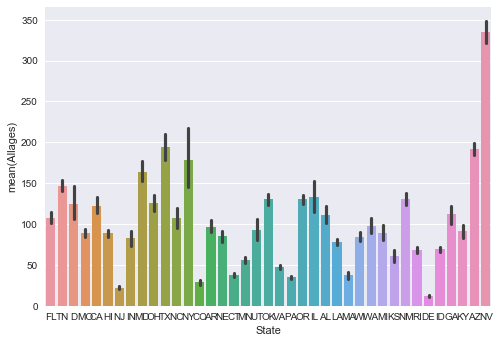

In [199]:
sns.barplot(x='State', y='Allages', data=data)
plt.show()

In [188]:
data[['Location', 'Allages']].groupby(['Location'], as_index=False).mean()

,Location,Allages
0,Akron,54.846154
1,Albany,51.820513
2,Albuquerque,130.783784
3,Allentown,30.076923
4,Atlanta,161.210526
5,Austin,100.000000
6,Baltimore,164.184211
7,Baton Rouge,95.564103
8,Berkeley,11.891892
9,Birmingham,185.769231


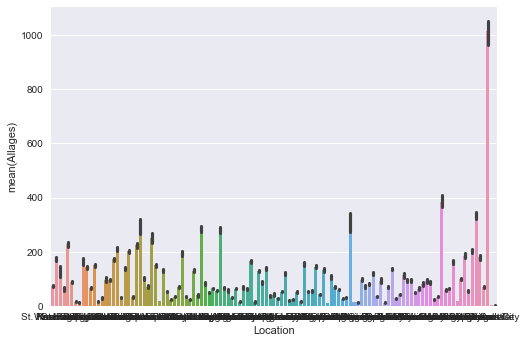

In [189]:
sns.barplot(x='Location', y='Allages', data=data)
plt.show()

In [190]:
data2[['Location', 'Allages']].groupby(['Location'], as_index=False).mean()

,Location,Allages
0,E.N. Central,2123.923077
1,E.S. Central,998.538462
2,Mid. Atlantic,1663.230769
3,Mountain,1146.333333
4,New England,525.974359
5,Pacific,1751.025641
6,S. Atlantic,1158.717949
7,Total,11552.384615
8,W.N. Central,612.179487
9,W.S. Central,1572.461538


In [191]:
data2 = data2[data2.Location!= 'Total']

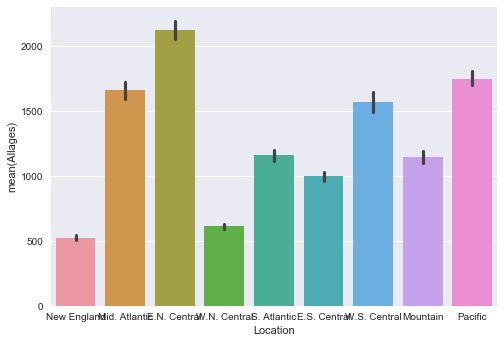

In [192]:
sns.barplot(x='Location', y='Allages', data=data2)
plt.show()

In [193]:
agewise=data2[['Location', 'Allages', 'Age>=65', 'Age45-64', 'Age25-44', 'Age1-24', 'Age<1' ]].groupby( ['Location'],as_index=False).mean()


In [194]:
agewise

,Location,Allages,Age>=65,Age45-64,Age25-44,Age1-24,Age<1
0,E.N. Central,2123.923077,1394.282051,505.410256,141.538462,45.948718,36.589744
1,E.S. Central,998.538462,649.871795,239.974359,68.051282,22.512821,18.051282
2,Mid. Atlantic,1663.230769,1186.230769,346.717949,88.743590,24.897436,16.128205
3,Mountain,1146.333333,775.461538,255.230769,73.948718,24.974359,16.025641
4,New England,525.974359,358.333333,115.897436,34.384615,9.487179,7.794872
5,Pacific,1751.025641,1234.179487,369.974359,90.846154,30.948718,23.025641
6,S. Atlantic,1158.717949,738.615385,293.051282,78.692308,26.538462,21.205128
7,W.N. Central,612.179487,392.820513,150.487179,38.948718,14.487179,14.230769
8,W.S. Central,1572.461538,1008.307692,381.948718,111.974359,38.589744,31.512821


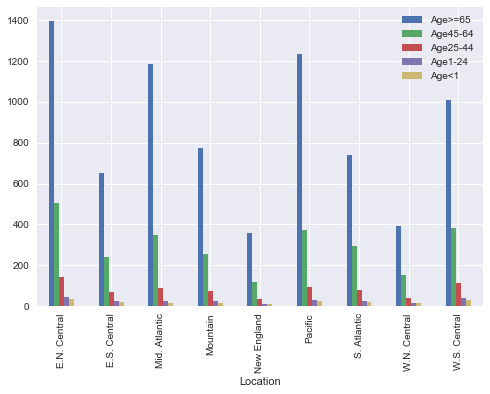

In [195]:
#sns.barplot(x='Location', y='Age>=65', data=agewise)
#plt.show()

agewise.plot(x='Location', y=["Age>=65", "Age45-64", "Age25-44", "Age1-24", "Age<1"], kind="bar")
plt.show()

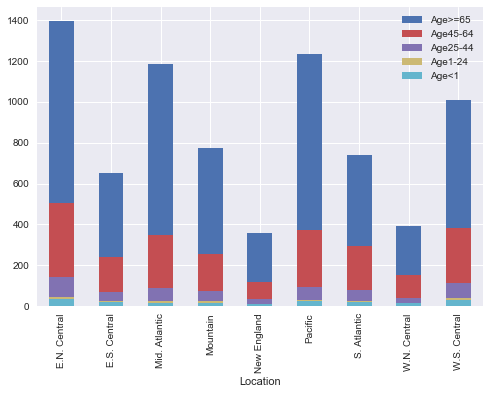

In [196]:
ax = agewise.plot(x="Location", y="Age>=65", kind="bar")
agewise.plot(x="Location", y="Age45-64", kind="bar", ax=ax, color="C2")
agewise.plot(x="Location", y="Age25-44", kind="bar", ax=ax, color="C3")
agewise.plot(x="Location", y="Age1-24", kind="bar", ax=ax, color="C4")
agewise.plot(x="Location", y="Age<1", kind="bar", ax=ax, color="C5")

plt.show()